In [58]:
import os
from pathlib import Path
import numpy as np
import pickle
import matplotlib.animation as manimation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import sqlite3 as sql
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import pandas as pd


In [59]:
dir = r'/Users/janagonzalez/level2/' 
os.chdir(dir)

In [60]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(dir) if isfile(join(dir, f))]
files

['patches.pkl', 'origins.mp4']

In [61]:
objects = []
with (open("patches.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [62]:
a = objects[0]

In [63]:
a.shape

(87080, 8)

In [69]:
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

NameError: name 'x_min' is not defined

In [65]:
a.shape

(87080, 8)

In [67]:
#X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
#a[0:200,0:4]
X = np.unique(a[:,0]).reshape(-1, 1)
print(f'X: {X.shape}')
Y = np.empty((X.shape[0],2))
print(f'Y: {Y.shape}')


X: (1001, 1)
Y: (1001, 2)


In [68]:
stepMin = 113
stepMax = 120 # 500 #600
file = dir + "/origins.mp4"
path = Path(file)
if path.is_file():
    os.remove(file)
FFMpegWriter = manimation.writers["ffmpeg"]
metadata = dict(title="Patches", artist="Matplotlib", comment="AMR Testcase")
writer = FFMpegWriter(fps=10,metadata=metadata)
fig = plt.figure(figsize=(20,10))
colors = ["r", "b", "g", "y", "m", "c"]
ax = fig.add_subplot(111)
frames=stepMax-stepMin+1

#A = a[a[:,7].argsort()[:-1]]
with writer.saving(fig, file, frames):
    for step in range(X.shape[0]):
        if stepMin <= step <= stepMax:
            plt.xlabel("x",labelpad=10)
            plt.ylabel("y",labelpad=10)
            plt.title(f"Level 1 Origins: step {step}")
            plt.grid(True)
            plt.xlim(0.0, 1.0)
            plt.ylim(0.0, 0.5)
            plt.grid(visible=True)
            condition = (a[:,0] == step)
            A = a[condition,1:4]
            condition = (A[:,0] == 1) # only level 1 boxes
            A = A[condition,1:3]
            for origin in range(A.shape[0]):
                #print(f'{origin}: step {A[origin,0]}: {A[origin,1]}')
                plt.scatter(A[origin,0], A[origin,1], color = 'blue')
            writer.grab_frame()
            print(f'wrote step {step}')
            plt.clf()
        
writer.finish()

wrote step 113
wrote step 114
wrote step 115
wrote step 116
wrote step 117
wrote step 118
wrote step 119
wrote step 120


<Figure size 2000x1000 with 0 Axes>

In [ ]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("x",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.scatter(xx,yy, color = 'blue')
plt.show()


In [70]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))

rows = xx.shape[0]
cols = xx.shape[1]
X = np.empty((rows * cols, 2))
print(X.shape)
y = np.zeros(rows * cols, dtype=int)


data = np.unique(a[:,0]).reshape(-1, 1)
print(f'data: {data.shape}')
#Y = np.empty((X.shape[0],2))
#print(f'Y: {Y.shape}')

stepMin = 113
stepMax = 113 # 500 #600
i = 0
for step in range(data.shape[0]):
    if stepMin <= step <= stepMax:
        condition = (a[:,0] == step)
        A = a[condition,1:4]
        condition = (A[:,0] == 1) # only level 1 boxes
        A = A[condition,1:3]
        for origin in range(A.shape[0]):
            #print(f'{origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {A[origin,1] * NCOLS + A[origin,0]}')
            offset2 = int(A[origin,1]/h * cols + A[origin,0]/h)
            print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {offset2}')
            #XX = np.append(XX,i)
            #yy = np.append(yy,offset3)
            y[offset2] = 1
            i += 1

(45, 2)
data: (1001, 1)
x_i 0, 0: step 113, origin (0.0, 0.0), 2D offset 0
x_i 1, 1: step 113, origin (0.0, 0.125), 2D offset 9
x_i 2, 2: step 113, origin (0.0, 0.25), 2D offset 18
x_i 3, 3: step 113, origin (0.0, 0.375), 2D offset 27


In [74]:
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

0
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
(45, 2)
ZZ: (5, 9, 3)
x_i 4, 0: step 1000, origin (0.0, 0.0)
x_i 4, 1: step 1000, origin (0.0, 0.125)
x_i 4, 2: step 1000, origin (0.0, 0.25)
x_i 4, 3: step 1000, origin (0.0, 0.375)
1
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=[1, 1]))
(45, 2)
ZZ: (5, 9, 3)
x_i 4, 0: step 1000, origin (0.0, 0.0)
x_i 4, 1: step 1000, origin (0.0, 0.125)
x_i 4, 2: step 1000, origin (0.0, 0.25)
x_i 4, 3: step 1000, origin (0.0, 0.375)


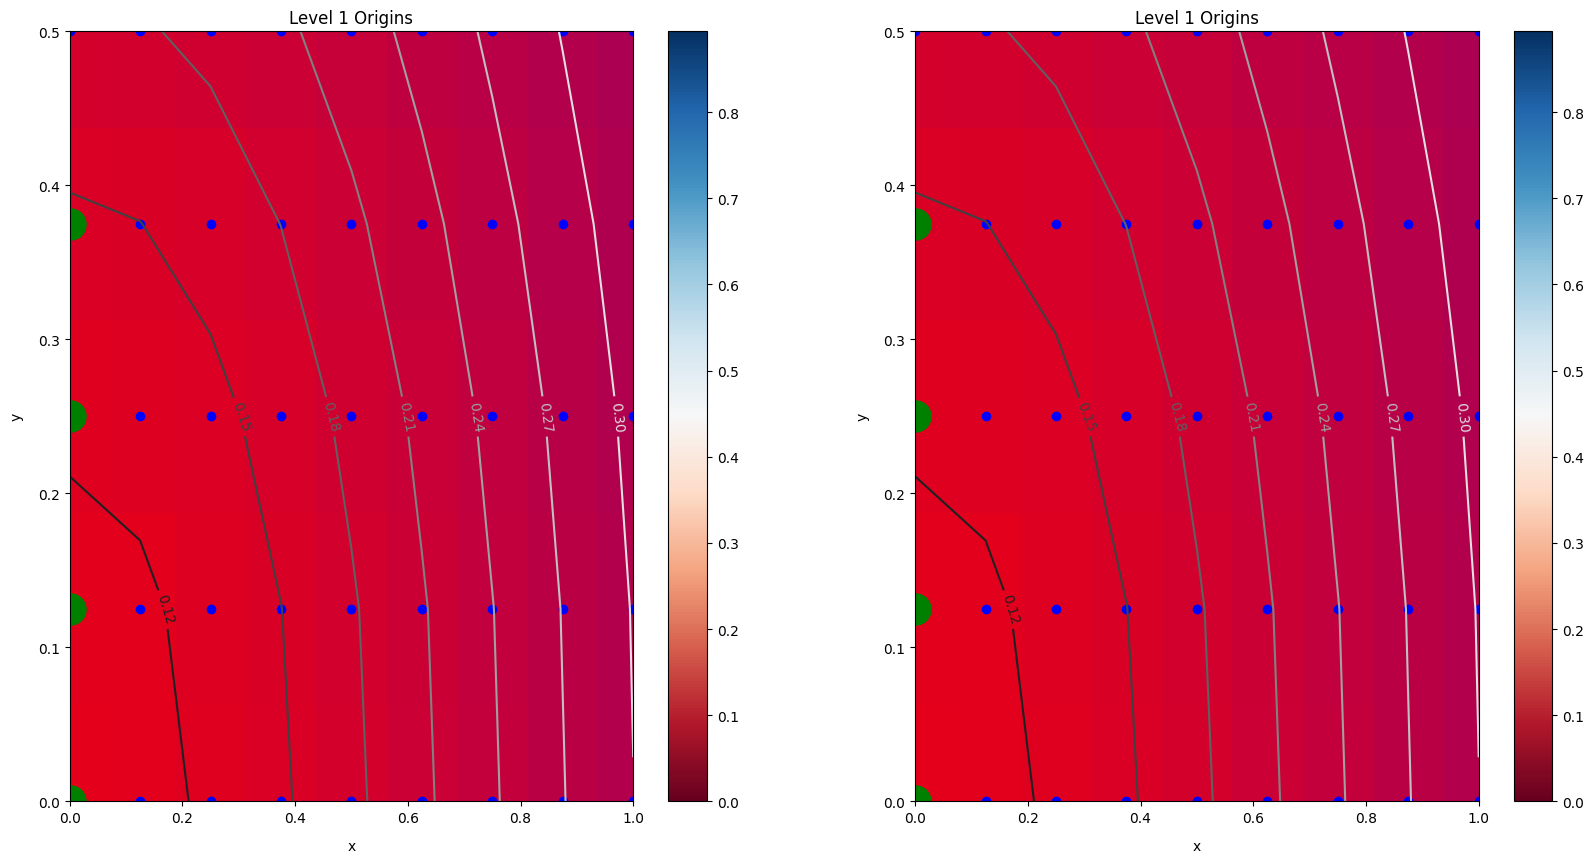

In [75]:
fig = plt.figure(figsize=(20,10))
'''
#ax = fig.add_subplot(1, 1, 1)
plt.xlabel("x",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.scatter(xx,yy, color = 'blue')
#plt.show()
'''
for k, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    print(k)
    print(clf)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    #print(Z)
    print(Z.shape)
    Z = Z.reshape((xx.shape[0], xx.shape[1], 2))


    #print(f'xx: {xx.shape}')
    #print(f'yy: {yy.shape}')
    #print(f'Z: {Z.shape}')

    pad = np.zeros((xx.shape[0], xx.shape[1], 1))
    #print(f'pad: {pad.shape}')

    #ZZ = np.append(Z,pad,axis=2)
    ZZ = np.dstack((Z,pad))
    ZZ[:,:,[2,1]] =  ZZ[:,:,[1,2]]





    print(f'ZZ: {ZZ.shape}')
    


    plt.subplot(1, 2, k + 1)
    plt.xlabel("x",labelpad=10)
    plt.ylabel("y",labelpad=10)
    plt.title(f"Level 1 Origins")
    #plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    major_ticks = np.arange(x_min, x_max+h, h)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    


    # pcolormesh needs the pixel edges for x and y
    # and with default flat shading, Z needs to be evaluated at the pixel center
    plot = plt.pcolormesh(xx, yy, ZZ, cmap='RdBu', shading='nearest')
    plt.scatter(xx,yy, color = 'blue')
    ax.grid(color='b', linestyle='-', linewidth=2, alpha=0.9)
    for origin in range(A.shape[0]):
        print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]})')
        plt.scatter(A[origin,0], A[origin,1], c="g", marker='o', s=500)
    # contour needs the centers
    cset = plt.contour(xx, yy, Z[:,:,1], cmap='gray')
    plt.clabel(cset, inline=True)

    plt.colorbar(plot)

plt.show()


In [ ]:
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        print(f'{i},{j}')
        print(f'{i*h},{j*h}')

In [ ]:
# connection to database
database = "test.db"
connection = sql.connect(database)
cursor = connection.cursor()

In [ ]:
query = '''SELECT * FROM patch_database'''

In [76]:
print(a.shape)
steps = np.unique(a[:,0]).reshape(-1, 1)
for step in range(data.shape[0]):
    print(step)
    condition = (a[:,0] == step)
    A = a[condition,1:4]
    condition = (A[:,0] == 1) # only level 1 boxes
    A = A[condition,1:3]
    print(f'A: {A.shape}')
    for origin in range(A.shape[0]):
        #ffset2D = 
        sql = "INSERT INTO patch_database (step, X, Y, Probability, Width, Height) VALUES ({steps}, {A[origin,0]}, {A[origin,1]}, ZZ, , )"
    #data  = (step, {data[origin,0]}, {data[origin,1]}, ZZ, xx, yy) 
    #cursor.execute(sql,data)

(87080, 8)
0
(32, 2)
1
(32, 2)
2
(32, 2)
3
(32, 2)
4
(32, 2)
5
(32, 2)
6
(32, 2)
7
(32, 2)
8
(32, 2)
9
(32, 2)
10
(32, 2)
11
(32, 2)
12
(32, 2)
13
(32, 2)
14
(32, 2)
15
(32, 2)
16
(32, 2)
17
(32, 2)
18
(32, 2)
19
(32, 2)
20
(32, 2)
21
(32, 2)
22
(32, 2)
23
(32, 2)
24
(32, 2)
25
(32, 2)
26
(32, 2)
27
(32, 2)
28
(32, 2)
29
(32, 2)
30
(32, 2)
31
(32, 2)
32
(32, 2)
33
(32, 2)
34
(32, 2)
35
(32, 2)
36
(32, 2)
37
(32, 2)
38
(32, 2)
39
(32, 2)
40
(32, 2)
41
(32, 2)
42
(32, 2)
43
(32, 2)
44
(32, 2)
45
(32, 2)
46
(32, 2)
47
(32, 2)
48
(32, 2)
49
(32, 2)
50
(32, 2)
51
(32, 2)
52
(32, 2)
53
(32, 2)
54
(32, 2)
55
(32, 2)
56
(32, 2)
57
(32, 2)
58
(32, 2)
59
(32, 2)
60
(32, 2)
61
(32, 2)
62
(32, 2)
63
(32, 2)
64
(32, 2)
65
(32, 2)
66
(32, 2)
67
(32, 2)
68
(32, 2)
69
(32, 2)
70
(32, 2)
71
(32, 2)
72
(32, 2)
73
(32, 2)
74
(32, 2)
75
(32, 2)
76
(32, 2)
77
(32, 2)
78
(32, 2)
79
(32, 2)
80
(32, 2)
81
(32, 2)
82
(32, 2)
83
(32, 2)
84
(32, 2)
85
(32, 2)
86
(32, 2)
87
(32, 2)
88
(32, 2)
89
(32, 2)
90
(32, 2

In [ ]:
df = pd.read_sql_query(query,connection)
df.head()